<a href="https://colab.research.google.com/github/PikasXYZ/use-LLM-with-Python/blob/main/together_ai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#install

In [1]:
!pip install together

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 40.2 MB/s eta 0:00:00
  Attempting uninstall: pillow
    Found existing installation: Pillow 9.4.0
    Uninstalling Pillow-9.4.0:
      Successfully uninstalled Pillow-9.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imageio 2.31.6 requires pillow<10.1.0,>=8.3.2, but you have pillow 10.3.0 which is incompatible.


#import

In [4]:
import os
import json
import requests
from together import Together
import base64
from PIL import Image
from io import BytesIO
from IPython.display import display
from google.colab import userdata

#Settings

In [5]:
#@title api setting
TOGETHER_AI_API_KEY = userdata.get("TOGETHER_AI_API_KEY")

In [6]:
#@title payload settings (generating text)
payload = {
    "model": "mistralai/Mixtral-8x7B-v0.1",
    "prompt": "Pikas is so handsome right?",
    "max_tokens": 20,
    "stop": ["Xi winnie", "Trump"],
    "temperature": 0.7,
    "top_p": 0.7,
    "top_k": 50,
    "repetition_penalty": 1,
    "safety_model": "Meta-Llama/Llama-Guard-7b",
    "n": 1,
    "logprobs": 0,
    "echo": True,
    "stream": False
}

In [7]:
#@title payload settings (generating text)
payload = {
    "model": "mistralai/Mixtral-8x7B-Instruct-v0.1", # required
    "temperature": 0.7,
    "response_format": { "type": "json_object" },
    "frequency_penalty": 0,
    "presence_penalty": 0,
    "messages": [ # required
        {
            "role": "system",
            "content": "You are a helpful travel agent"
        },
        {
            "role": "user",
            "content": "what's fun in Taiwan?"
        }
    ],
    "stream": False,
    "max_tokens": 512,
    "stop": ["Xi winnie", "Trump"],
    "top_p": 0.7,
    "top_k": 50,
    "repetition_penalty": 1,
    "logprobs": 0,
    "echo": False,
    "n": 1,
    "safety_model": "Meta-Llama/Llama-Guard-7b",
#     "min_p": 0.7 # An alternative to temperature. Please only use one but not both
}

In [8]:
#@title header setting
headers = {
    "accept": "application/json",
    "content-type": "application/json",
    "Authorization": f"Bearer {TOGETHER_AI_API_KEY}"
}

#Main

In [9]:
#@title generating text (normal)
completions_url = "https://api.together.xyz/v1/completions"
payload = {
    "model": "mistralai/Mixtral-8x7B-v0.1",
    "prompt": "Pikas is so handsome right?",
    "max_tokens": 20,
}
response = requests.post(completions_url, json=payload, headers=headers).json()
reply = response["choices"][0]["text"]
print(reply)



I’m not sure if I’m going to be able to get a good shot


In [12]:
#@title generating text (stream)
completions_url = "https://api.together.xyz/v1/completions"
payload = {
    "model": "mistralai/Mixtral-8x7B-v0.1",
    "prompt": "Pikas is so handsome right?",
    "max_tokens": 32,
    "stream": True # If true, stream tokens as Server-Sent Events as the model generates them
}
response = requests.post(completions_url, json=payload, headers=headers)
for chunk in response.iter_lines():
    if chunk:
        try:
            decoded_chunk = chunk.decode('utf-8').replace("data: ","")
            reply = json.loads(decoded_chunk)["choices"][0]["text"]
            print(reply or "", end="", flush=True)
        except json.JSONDecodeError:
            pass # stream finished



I’m not sure if I’m going to be able to get a good shot of the Pika, but I’m going to try

In [13]:
#@title chatting w/ history
chat_completions_url = "https://api.together.xyz/v1/chat/completions"
payload = {
    "model": "mistralai/Mixtral-8x7B-Instruct-v0.1",
    "messages": [
        {
            "role": "system",
            "content": "You are a helpful travel agent"
        },
        {
            "role": "user",
            "content": "what's fun in Taiwan?"
        }
    ],
}

response = requests.post(chat_completions_url, json=payload, headers=headers).json()
reply = response["choices"][0]["message"]["content"]
print(reply)

# reply can be appended in payload["messages"] for subsequent chatting
payload["messages"].append({"role":"assistant", "content":reply})
payload["messages"].append({"role": "user", "content": "Then what's fun in Tailand?"})
response2 = requests.post(chat_completions_url, json=payload, headers=headers).json()
reply2 = response2["choices"][0]["message"]["content"]
print(reply2)

 Taiwan is a wonderful island nation in East Asia that is known for its rich cultural history, friendly people, and natural beauty. Here are some fun things you can do in Taiwan:

1. Visit Taipei 101: Once the tallest building in the world, Taipei 101 is a must-visit attraction in Taiwan. You can take the high-speed elevator to the observation deck for breathtaking views of the city.
2. Explore Taipei's night markets: Taipei is famous for its vibrant night markets, where you can sample delicious street food, shop for souvenirs, and experience the local culture. Some of the most popular night markets include Shilin Night Market, Raohe Street Night Market, and Ningxia Night Market.
3. Hike in Taroko National Park: Taroko National Park is a stunning natural wonder that is home to marble canyons, hot springs, and hiking trails. You can explore the park on your own or join a guided tour.
4. Visit the National Palace Museum: The National Palace Museum is home to one of the largest collection

In [14]:
#@title chatting w/ history (stream)
chat_completions_url = "https://api.together.xyz/v1/chat/completions"
payload = {
    "model": "mistralai/Mixtral-8x7B-Instruct-v0.1",
    "messages": [
        {
            "role": "system",
            "content": "You are a helpful travel agent"
        },
        {
            "role": "user",
            "content": "what's fun in Taiwan?"
        }
    ],
    "stream" : True
}

response = requests.post(chat_completions_url, json=payload, headers=headers)
for chunk in response.iter_lines():
    if chunk:
        try:
            decoded_chunk = chunk.decode('utf-8').replace("data: ","")
            reply = json.loads(decoded_chunk)["choices"][0]["delta"]["content"]
            print(reply or "", end="", flush=True)
        except json.JSONDecodeError:
            pass # stream finished

 Taiwan is a wonderful island nation in East Asia that is known for its rich cultural history, friendly people, and natural beauty. Here are some fun things you can do in Taiwan:

1. Visit Taipei 101: Once the tallest building in the world, Taipei 101 is a must-visit attraction in Taiwan. You can take the high-speed elevator to the observation deck for breathtaking views of the city.
2. Explore Taipei's night markets: Taipei is famous for its vibrant night markets, where you can sample delicious street food, shop for souvenirs, and experience the local culture. Some of the most popular night markets include Shilin Night Market, Raohe Street Night Market, and Ningxia Night Market.
3. Hike in Taroko National Park: Taroko National Park is a stunning natural wonder that is home to marble canyons, hot springs, and hiking trails. You can explore the park on your own or join a guided tour.
4. Visit the National Palace Museum: The National Palace Museum is home to one of the largest collection

In [15]:
#@title Sentiment Analysis
endpoint = 'https://api.together.xyz/inference'
res = requests.post(endpoint, json={
    "model": 'togethercomputer/RedPajama-INCITE-7B-Base',
    "prompt": """\
      Label the sentences as either "positive", "negative", "mixed", or "neutral":

      Sentence: Pikas is handsome.
      Label: positive

      Sentence: Pikas is not ugly but not hansome.
      Label: neutral

      Sentence: Pikas is ugly but tall.
      Label: mixed

      Sentence: Pikas is ugly.
      Label: negative

      Sentence: Pikas is tall.
      Label:""",
    "top_p": 1,
    "top_k": 40,
    "temperature": 0.8,
    "max_tokens": 1,
    "repetition_penalty": 1,
    },
    headers={
        "Authorization": f"Bearer {TOGETHER_AI_API_KEY}",
    })
print(res.json()['output']['choices'][0]['text']) # ' positive'

 positive


In [18]:
#@title Topic classification
endpoint = 'https://api.together.xyz/inference'
res = requests.post(endpoint, json={
    "model": "togethercomputer/RedPajama-INCITE-Base-3B-v1",
    "prompt": """
        Given a news article, classify its topic.
        Possible labels: 1. World 2. Sports 3. Business 4. Sci/Tech

        Article: A nearby star thought to harbor comets and asteroids now appears to be home to planets, too.
        Label: Sci/Tech

        Article: Soaring crude prices plus worries about the economy and the outlook for earnings are expected to hang over the stock market next week during the depth of the summer doldrums.
        Label: Business

        Article: Murtagh a stickler for success Northeastern field hockey coach Cheryl Murtagh doesn't want the glare of the spotlight that shines on her to detract from a team that has been the America East champion for the past three years and has been to the NCAA tournament 13 times.
        Label: """,
    "top_p": 1,
    "top_k": 40,
    "temperature": 0.8,
    "max_tokens": 3,
    "repetition_penalty": 1,
    },
    headers={
        "Authorization": f"Bearer {TOGETHER_AI_API_KEY}"
    })
print(res.json()['output']['choices'][0]['text']) # 'sport'

 Sports



In [19]:
#@title Question answering
endpoint = 'https://api.together.xyz/inference'
res = requests.post(endpoint, json={
    "model": "togethercomputer/RedPajama-INCITE-7B-Instruct",
    "prompt": """\
        Daniel travelled to the kitchen.
        Mary grabbed the milk.
        Daniel went back to the hallway.
        John moved to the kitchen.
        Daniel travelled to the office.
        John grabbed the apple.
        John journeyed to the garden.
        John dropped the apple.
        John moved to the hallway.
        Mary dropped the milk.
        Daniel went back to the bathroom.
        Mary grabbed the milk there.
        Mary went back to the garden.
        Mary went to the hallway.
        Mary left the milk.
        John journeyed to the bedroom.
        Question: Where was the milk before the hallway?
				Answer: """,
    "top_p": 1,
    "top_k": 40,
    "temperature": 0.1,
    "max_tokens": 3,
    "repetition_penalty": 1,
    },
    headers={
        "Authorization": f"Bearer {TOGETHER_AI_API_KEY}"
    })
print(res.json()['output']['choices'][0]['text']) # 'garden'


garden


In [20]:
#@title Troubleshooting code
url = "https://api.together.xyz/inference"
payload = {
    "model": "togethercomputer/RedPajama-INCITE-7B-Chat",
    "prompt": "I got \"ImportError: No module named matplotlib\" while using Spyder, how to solve it?",
    "max_tokens": 512,
    "temperature": 0.1,
    "top_p": 0.7,
    "top_k": 50,
    "repetition_penalty": 1
}
headers = {
    "accept": "application/json",
    "content-type": "application/json",
    "Authorization": f"Bearer {TOGETHER_AI_API_KEY}"
}

response = requests.post(url, json=payload, headers=headers)
print(response.json()['output']['choices'][0]['text'])


<bot>: You didn't specify under which version of Python you're encountering this error, but here are some possible solutions:

1. Update your Python installation: Make sure that Python is installed in the same directory as your Matplotlib file. You can check which version of Python you have by running python --version in your terminal. If you're using a version of Python other than 2.7 or 3.6, update your installation to one of these versions.

2. Add Matplotlib to your Python path: You can add Matplotlib to your PATH variable. This can be done by modifying your Python installation's environment variables in your operating system's control panel.

3. Install Matplotlib with pip: If updating your Python installation or adding Matplotlib to your PATH variable doesn't work, you can install Matplotlib using the pip command:

python --version

pip install matplotlib

This will install the latest version of Matplotlib into your Python path.

4. Update Spyder: Make sure that you have the lat

In [21]:
#@title Writing Python functions
url = "https://api.together.xyz/inference"
payload = {
    "model": "togethercomputer/RedPajama-INCITE-7B-Chat",
    "prompt": "Generate a Python function to calculate the factorial of a number.",
    "max_tokens": 256,
    "stop": "<human>:",
    "temperature": 0.1,
    "top_p": 0.7,
    "top_k": 50,
    "repetition_penalty": 1
}
headers = {
    "accept": "application/json",
    "content-type": "application/json",
    "Authorization": f"Bearer {TOGETHER_AI_API_KEY}"
}

response = requests.post(url, json=payload, headers=headers)
print(response.json()['output']['choices'][0]['text'])



The factorial of a number "n" is defined as "n!" = "n" * "n" * ... * "1!". The asterisk "!" means "exclamation mark" and it is used to indicate that the factorial is being multiplied by itself.

So, for example, the factorial of 3 is "3!" = "3" * "3" * ... * "3!".

Here is a sample Python function that calculates the factorial of a number:

```
def factorial(n):
    if n == 0:
        return 1
    else:
        return n * factorial(n - 1)
```

This function takes a number "n" as an input and returns the factorial "n!". It uses a recursive algorithm to calculate the factorial by multiplying "n" with "n" itself.

Note: You can customize the function to handle any number of digits after the decimal point.



In [22]:
#@title Generating a simple HTML page
url = "https://api.together.xyz/inference"
payload = {
    "model": "togethercomputer/RedPajama-INCITE-7B-Chat",
    "prompt": "Generate a simple HTML page showing \"Hello world!\"",
    "max_tokens": 256,
    "stop": "<human>:",
    "temperature": 0.1,
    "top_p": 0.7,
    "top_k": 50,
    "repetition_penalty": 1
}
headers = {
    "accept": "application/json",
    "content-type": "application/json",
    "Authorization": f"Bearer {TOGETHER_AI_API_KEY}"
}

response = requests.post(url, json=payload, headers=headers)
print(response.json()['output']['choices'][0]['text'])

 in a simple blue box element with a black border and a yellow background.
<html>
  <head>
    <title>Hello World!</title>
  </head>
  <body>
    <h1>Hello World!</h1>
  </body>
</html>



In [29]:
#@title Grammar correction
url = "https://api.together.xyz/inference"
payload = {
    "model": "meta-llama/Llama-3-70b-chat-hf",
    "prompt": "Correct this to standard English:\n\"I no Sandwich want.\"",
    "max_tokens": 9,
    "stop": "<human>:",
    "temperature": 0.1,
    "top_p": 0.7,
    "top_k": 50,
    "repetition_penalty": 1
}
headers = {
    "accept": "application/json",
    "content-type": "application/json",
    "Authorization": f"Bearer {TOGETHER_AI_API_KEY}"
}

response = requests.post(url, json=payload, headers=headers)
print(response.json()['output']['choices'][0]['text'])

 -> "I don't want a sandwich."



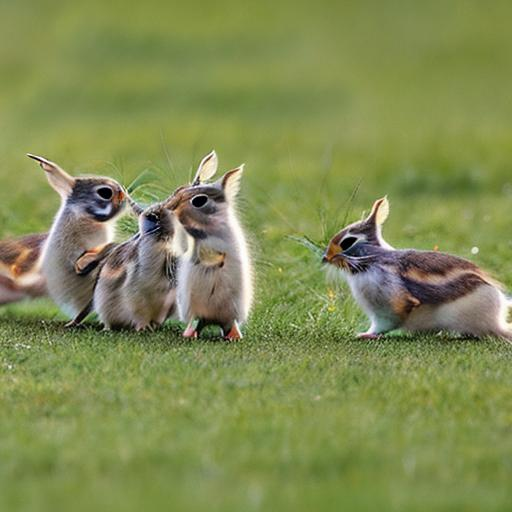

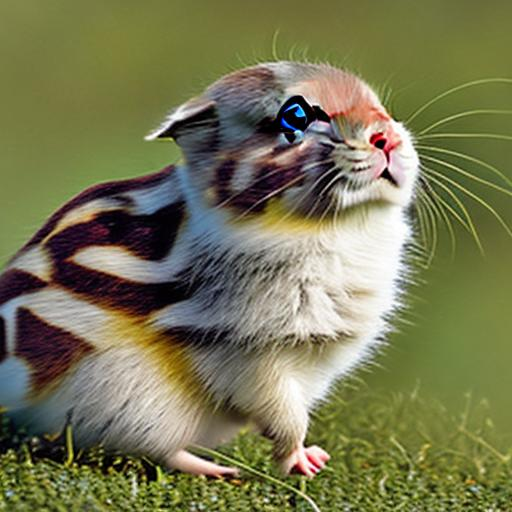

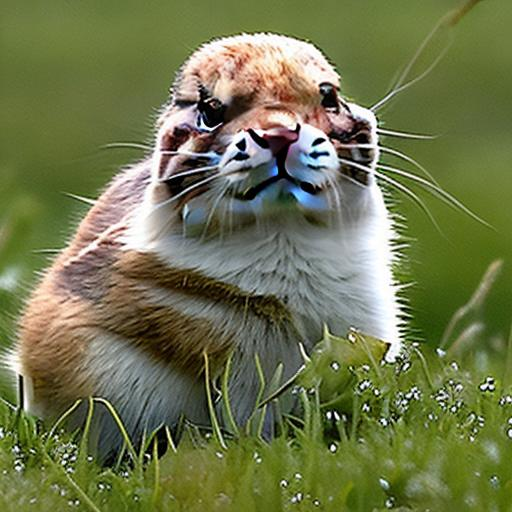

In [30]:
#@title Image generation
endpoint = 'https://api.together.xyz/inference'
account_name = "Pikas XYZ"
res = requests.post(endpoint, json={
    "model": "prompthero/openjourney",
    "prompt": "pikas on the grassland",
    "n": 3,
    "steps": 20
    },
    headers={
        "Authorization": f"Bearer {TOGETHER_AI_API_KEY}",
    })

for choice in res.json()['output']['choices']:
    image_base64 = choice['image_base64']
    image_data = base64.b64decode(image_base64)
    image = Image.open(BytesIO(image_data))
    display(image)

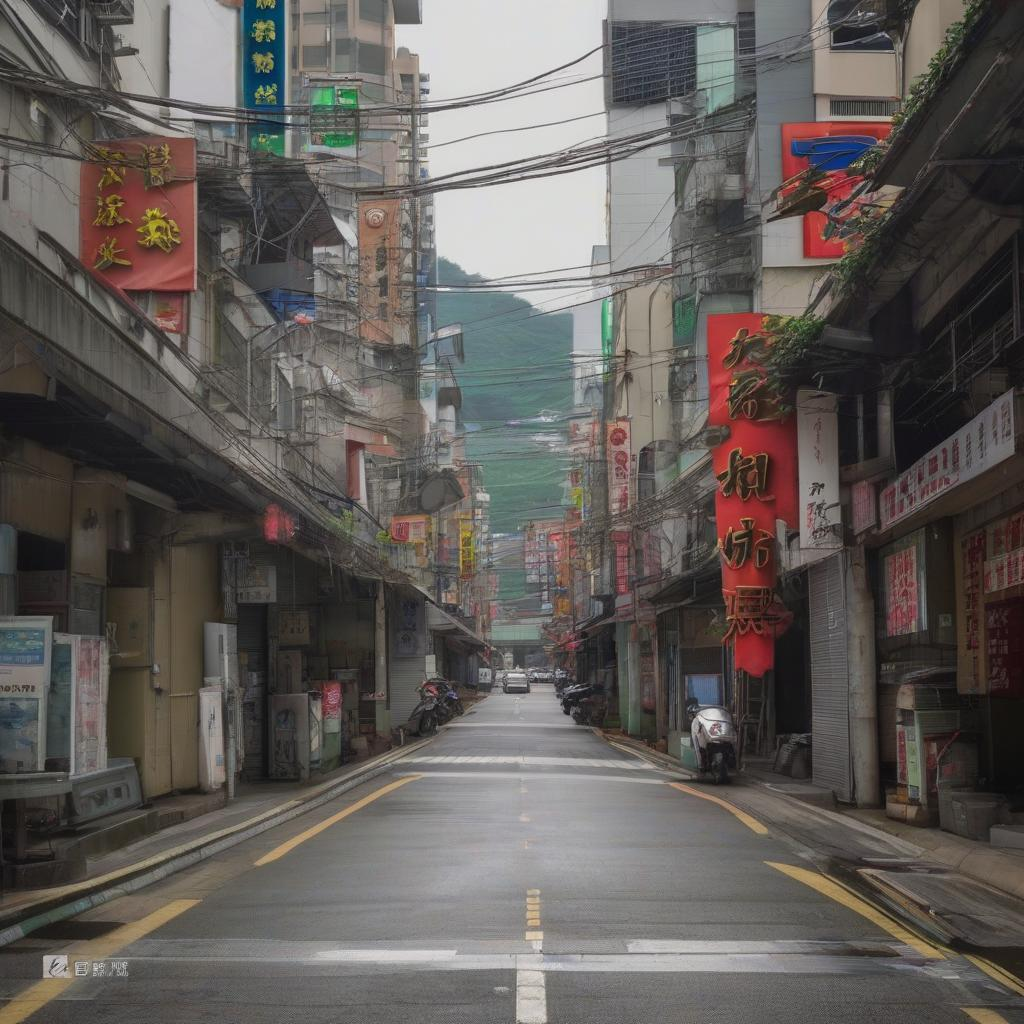

In [31]:
#@title Image generation w/ a negative prompt
url = "https://api.together.xyz/inference"
payload = {
    "model": "stabilityai/stable-diffusion-xl-base-1.0",
    "prompt": "Taiwan Street",
    "results": 3,
    "width": 1024,
    "height": 1024,
    "steps": 20,
    "seed": 42,
    "negative_prompt": "people"
}
headers = {
    "accept": "application/json",
    "content-type": "application/json",
    "Authorization": f"Bearer {TOGETHER_AI_API_KEY}"
}
response = requests.post(url, json=payload, headers=headers, stream=True)
response.raise_for_status()
for choice in response.json()['output']['choices']:
    image_base64 = choice['image_base64']
    image_data = base64.b64decode(image_base64)
    image = Image.open(BytesIO(image_data))
    display(image)